In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7888 entries, 1 to 32557
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             7888 non-null   int64
 1   Workclass       7888 non-null   int64
 2   Fnlwgt          7888 non-null   int64
 3   Education       7888 non-null   int64
 4   Education_num   7888 non-null   int64
 5   Marital_status  7888 non-null   int32
 6   Occupation      7888 non-null   int32
 7   Relationship    7888 non-null   int32
 8   Race            7888 non-null   int32
 9   Sex             7888 non-null   int32
 10  Capital_gain    7888 non-null   int64
 11  Capital_loss    7888 non-null   int64
 12  Hours_per_week  7888 non-null   int64
 13  Native_country  7888 non-null   int32
 14  Income          7888 non-null   int64
dtypes: int32(6), int64(9)
memory usage: 801.1 KB


In [41]:
# seems no missing values.
# but we have numeric & categoical column both, so will use label encoder to make numeric column.
# taking categorical column out 


In [42]:
categorical_cols = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
                    'Native_country', 'Income']


In [43]:
#using Label encoders to Encode.
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [44]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
1,38,0,215646,5,9,0,4,1,0,1,0,0,40,0,0
4,37,0,284582,6,14,2,2,5,0,0,0,0,40,0,0
16,32,0,186824,5,9,4,5,4,0,1,0,0,40,0,0
23,59,0,109015,5,9,0,11,4,0,0,0,0,40,0,0
25,19,0,168294,5,9,4,1,3,0,1,0,0,40,0,0


In [45]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,7888.000000,7888.0,7888.000000,7888.00000,7888.000000,7888.000000,7888.000000,7888.000000,7888.0,7888.00000,7888.0,7888.0,7888.000000,7888.0,7888.0
mean,35.316176,0.0,178223.889833,5.08608,10.114604,2.626902,4.673682,1.542850,0.0,0.62931,0.0,0.0,41.306795,0.0,0.0
std,11.427987,0.0,85550.026740,2.09634,1.710001,1.632021,3.960565,1.502861,0.0,0.48302,0.0,0.0,3.769166,0.0,0.0
min,17.000000,0.0,18827.000000,0.00000,5.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,33.000000,0.0,0.0
25%,26.000000,0.0,115661.000000,3.00000,9.000000,2.000000,1.000000,0.000000,0.0,0.00000,0.0,0.0,40.000000,0.0,0.0
50%,33.000000,0.0,176076.000000,5.00000,10.000000,2.000000,4.000000,1.000000,0.0,1.00000,0.0,0.0,40.000000,0.0,0.0
75%,43.000000,0.0,224672.500000,7.00000,11.000000,4.000000,8.000000,3.000000,0.0,1.00000,0.0,0.0,40.000000,0.0,0.0
max,77.000000,0.0,414994.000000,8.00000,16.000000,6.000000,12.000000,5.000000,0.0,1.00000,0.0,0.0,52.000000,0.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


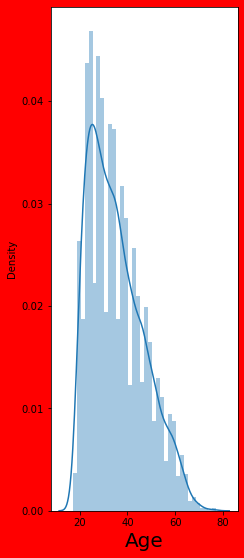

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


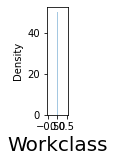

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


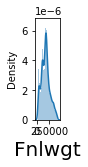

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


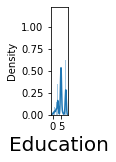

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


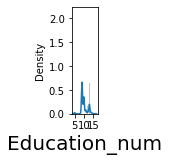

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


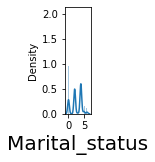

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


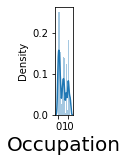

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


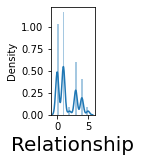

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


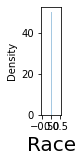

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


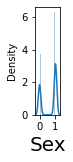

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


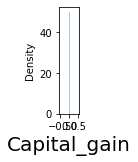

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


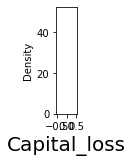

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


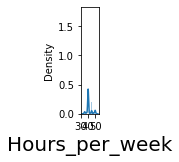

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


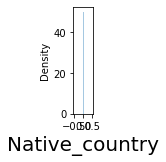

ValueError: num must be 1 <= num <= 14, not 15

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(20,15),facecolor="red")
plotnumber=1
for column in df:
    if plotnumber<=912:
        ax=plt.subplot(2,7,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
    plt.tight_layout()
    plt.show()

In [ ]:
# outliers are seen. distribution is not normal.
# will remove outiers thrugh IQR

In [47]:
# Calculate the IQR for each  column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [48]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [49]:
df = df[~((df < lower_bound)| (df > upper_bound)).any(axis=1)]


In [50]:
df.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
1,38,0,215646,5,9,0,4,1,0,1,0,0,40,0,0
4,37,0,284582,6,14,2,2,5,0,0,0,0,40,0,0
16,32,0,186824,5,9,4,5,4,0,1,0,0,40,0,0
23,59,0,109015,5,9,0,11,4,0,0,0,0,40,0,0
25,19,0,168294,5,9,4,1,3,0,1,0,0,40,0,0


In [51]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,5032.000000,5032.0,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5032.0,5032.000000,5032.0,5032.0,5032.0,5032.0,5032.0
mean,35.196741,0.0,175970.438394,5.172297,10.137122,2.648052,4.387520,1.595588,0.0,0.621622,0.0,0.0,40.0,0.0,0.0
std,11.390742,0.0,82162.854887,1.977493,1.503021,1.631392,3.883268,1.508607,0.0,0.485031,0.0,0.0,0.0,0.0,0.0
min,17.000000,0.0,18827.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,40.0,0.0,0.0
25%,26.000000,0.0,115851.000000,5.000000,9.000000,2.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,40.0,0.0,0.0
50%,33.000000,0.0,175520.500000,5.000000,10.000000,2.000000,4.000000,1.000000,0.0,1.000000,0.0,0.0,40.0,0.0,0.0
75%,43.000000,0.0,221918.000000,8.000000,11.000000,4.000000,8.000000,3.000000,0.0,1.000000,0.0,0.0,40.0,0.0,0.0
max,68.000000,0.0,387776.000000,8.000000,14.000000,6.000000,12.000000,5.000000,0.0,1.000000,0.0,0.0,40.0,0.0,0.0


In [53]:
# Splitting Data into X & Y.
# Split the data into features (X) and target (y)
X = df.drop('Income', axis=1)
y = df['Income']


In [55]:
# Spliting Data for training & testing.
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dfc =DecisionTreeClassifier (random_state=42)
dfc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [67]:
# Make predictions on the test set
y_pred_dfc = rfc.predict(X_test)

In [68]:
y_pred_dfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dfc)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
# Hence Accuracy score for decision tree classifier is 100%

In [71]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [72]:
# Make predictions on the test set
y_pred_rfc = rfc.predict(X_test)

In [73]:
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:

accuracy = accuracy_score(y_test, y_pred_rfc)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [75]:
from sklearn.model_selection import cross_val_score

In [85]:
# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

In [86]:
cv_scores

array([1., 1., 1., 1., 1.])

In [92]:
import joblib

In [93]:
# Saving Model both model gave 100% accuracy . we can use any of it model. we will sabe rfc model
joblib.dump(rfc, 'RandomForestClassifier_model.pkl')

['RandomForestClassifier_model.pkl']

In [94]:
# Load the saved model
rfc_loaded = joblib.load('RandomForestClassifier_model.pkl')

In [95]:
# Use the loaded model for predictions
y_pred_rfc = rfc_loaded.predict(X_test)